## <center> Unsupervised Clustering

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans,AgglomerativeClustering
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('./Mall_Customers.csv')
data.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
data.shape

(200, 5)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
data.isnull().mean()*100

CustomerID                0.0
Gender                    0.0
Age                       0.0
Annual Income (k$)        0.0
Spending Score (1-100)    0.0
dtype: float64

In [6]:
data.duplicated().sum()

0

In [7]:
data.drop(columns='CustomerID',inplace=True)

In [8]:
data.head(5)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [9]:
data = data.iloc[:,2:]

### K-Means
#### Elbow Method

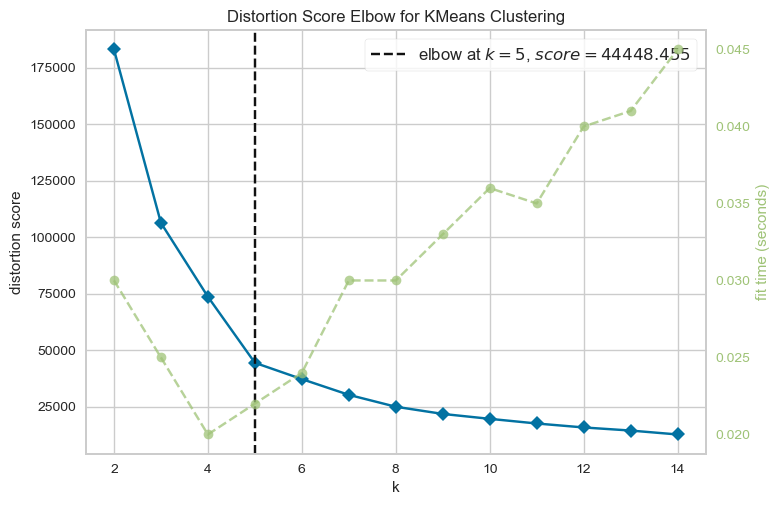

In [10]:
KM = KMeans()
graph = KElbowVisualizer(KM, k = range(2,15))
graph.fit(data)
graph.poof();

In [11]:
KM_5 = KMeans(n_clusters=5, random_state=42)

In [12]:
labels = KM_5.fit_predict(data)

In [13]:
data['cluster_ID'] = labels
data.head(5)

,Annual Income (k$),Spending Score (1-100),cluster_ID
0,15,39,2
1,15,81,3
2,16,6,2
3,16,77,3
4,17,40,2


### Silhouette Score

In [14]:
silhouette_score(data,labels)

0.5552538794032924

### Cluster Visualization

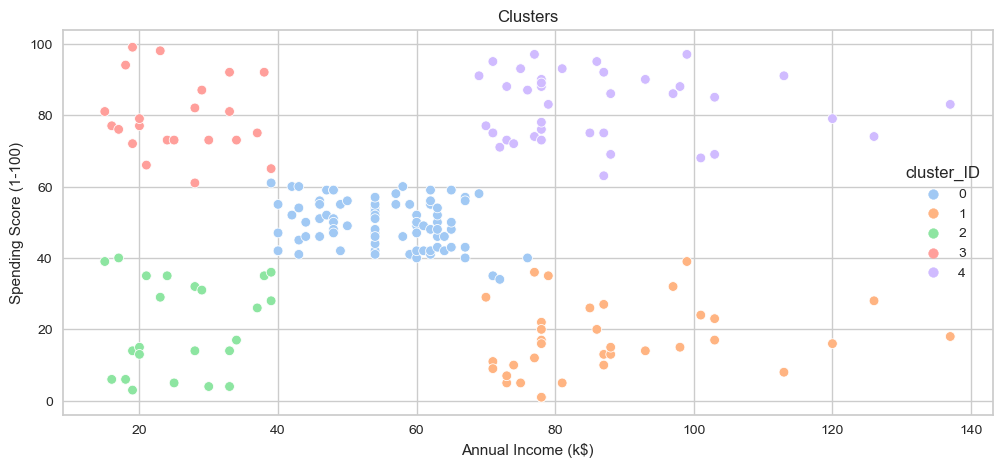

In [15]:
plt.figure(figsize=(12,5))
sns.scatterplot(data=data,x='Annual Income (k$)',y='Spending Score (1-100)',hue = 'cluster_ID',palette ='pastel')
plt.title('Clusters')
plt.show()